# Primera Entrega - Proyecto Final - Fabrizio Sgro

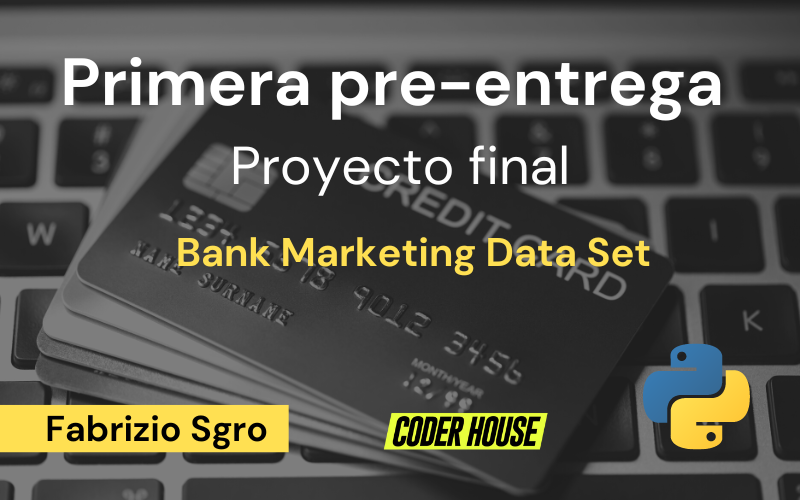

## Bank Marketing Data Set

**Fuente:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## 1. Variables del dataset
### Datos de los clientes del banco:
1.  Edad: Entero.
2.  Trabajo: Tipo de trabajo (categórico).
3.  Estado civil: Casado, divorciado, soltero. (divorciado aplica también para viudo/a). 
4.  Nivel de educación: Categórico (categórico con diferentes niveles de educación).
5.  Default: ¿Tiene credito en default? (categórico "Yes" o "No").
6.  Hipoteca: ¿Tiene hipoteca? (categorico "No","Yes",'desconocido').
7.  Préstamos personal: ¿Tiene préstamos personal? (categorico "No","Yes","Desconocido").
### Relacionado con el último conctacto con la campaña activa:
8.  Contacto: Tipo de contacto (categorico 'cellular' o 'telephone').
9.  Mes: Último mes en el que se contactó al cliente (categórico, enero, feb, mar, etc.) 
10.  Dia: Último día en el que se contactó al cliente (categórico, lunes, martes, miércoles, jueves, viernes) 
11.  Duración: Duración del último contacto en segundos (entero). No se tendrá en cuenta para el desarrollo del modelo predicitivo. 
### Otros atributos o variables:
12.  Campaña: Número de contactos realizados durante la campaña para cada cliente (entero e incluye el útimo contacto).
13.  Dia_p: Número de días que pasaron después de que el cliente fue contactado entre campaña y campaña (Entero. 999 significa que el cliente no fue previamente contactado).
14.  Previo: Número de contactos realizados antes de esta campaña para cada cliente (Entero)
15.  Previo_result: Resultado de la campaña de marketing previa (categorico: 'fracaso','no existente','exito')
### Variables sociales y de contexto económico:
16.  emp.var.rate: employment variation rate - Ratio de variación de empleamiento, es un indicador cuartil.
17.  cons.price.idx: consumer price index - Precio del consumidor, es un indicador mensual.
18.  cons.conf.idx: consumer confidence index - Confianza del consumidor, es un indicador mensual.
19.  euribor3m: euribor 3 month rate - Euribor, ratio de 3 meses, indicador diario.
20.  nr.employed: number of employees - Número de empleados, indicador cuartil. 

### Variable a predecir:
21.  y - ¿El cliente ha realizado un plazo fijo? Binario: Sí o No. 

## 2. Abstracto 

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo es predecir si el cliente realizará un plazo fijo en el futuro. 

Esto se debe a que el banco quiere maximizar el retorno de inversión que realiza en sus campañas de marketing directo. Si logramos identificar y predecir aquellos consumidores con mayor capacidad de realizar un plazo fijo. Le podríamos ahorrar mucho tiempo y dinero al departamento de marketing directo y telemarketing. Ya que sus llamadas estarían mejor segmentadas y tendrían mayor probabilidad de ser exitosas gracias al análisis de datos y el modelo que se necesita implementar.

Me motiva mucho el análisis de este dataset ya que me permite manejar variables que entiendo por haber estudiado marketing y por otro lado, este dataset podría permitirme la implementación de dos tipos de modelos, supervisado si lo que queremos es lograr predecir la posibilidad de que un consumidor haga un plazo fijo, el actual objetivo. Y una posible alternativa, la identificación y agrupamiento de sectores de consumidores con mayor y menos probabilidad de realizar un plazo fijo.

## 3. Hipótesis
1. Las personas que no tienen hipotecas ni préstamos personales tienen mayor posibilidad de realizar un plazo fijo.
2. Las personas de entre 18-44 tienen menos probabilidad de realizar un plazo fijo que las personas de entre 45-65.
3. Las personas con mayor nivel de educación tienen más probabilidad de realizar un plazo fijo. 
4. La spersonas casadas tienen más probabilidad de realizar un plazo fijo que las personas solteras.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [3]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(45211, 17)

In [6]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [7]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

**Nuestro primer análisis estadísitico nos indica:**
- El promedio de clientes tienen una edad de 41 años.
- El balance promedio es de 1362 dólares (puede no ser descriptiva, por que la desviación estandar es muy elevada, cómo indica JANIO MARTINEZ BACHMANN en https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit).
- Se realizaron 63 campañas en total.
- El promedio de días que trascurren antes de ser contactados por una nueva campaña, desde la anterior, son 40 días.
- El promedio de duración de las llamadas a los clientes está alrededor de los 257 segundos, es decir 4 minutos y 28 segundos. 


In [8]:
ss_a_min = 257/60
print('El promedio de duración de llamadas a los clientes es de', int(round(ss_a_min,0)), 'minutos y 28 segundos.')

El promedio de duración de llamadas a los clientes es de 4 minutos y 28 segundos.


In [9]:
df.isna().sum() # ¿Hay nans? ¡No! ¡Vamos!

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Comencemos a probar o eliminar nuestras hipótesis

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df = df.rename(columns={"y": "p_fijo"}) #cambio de nombre para en el EDA identificar mejor sí hizo o no un depósito de plazo fijo.
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      p_fijo  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

In [12]:
grouped = df.groupby(['loan','p_fijo', 'balance']).sum()
grouped

C:\Users\Fabrizio\AppData\Local\Temp\ipykernel_13616\2798244962.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['loan','p_fijo', 'balance']).sum()


age  day  duration  campaign  pdays  previous
loan p_fijo balance                                               
no   no     -4057     60   18       242         6     -1         0
            -3372     43   29       386         2     -1         0
            -2604     49   18       142         1     -1         0
            -2049     49   30       169         3     -1         0
            -1968     56   20        60         3     -1         0
...                  ...  ...       ...       ...    ...       ...
yes  yes     8749     32   21       294         1     -1         0
             9103     57   20      1098         2     -1         0
             10613    49    4      1226         1     -1         0
             12737    30   19       589         2     -1         0
             22125    37   21       331         2     -1         0

[11599 rows x 6 columns]

[Text(0.5, 1.0, 'Distribución del balance de clientes con préstamos y sin préstamos')]

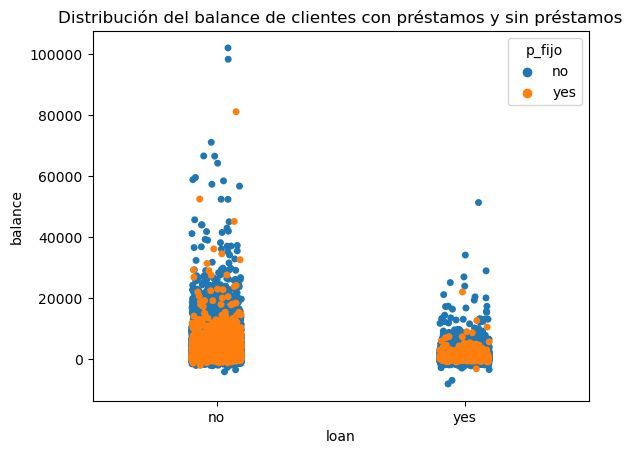

In [13]:
sns.stripplot(data=grouped, x='loan', y='balance', hue = 'p_fijo').set(title='Distribución del balance de clientes con préstamos y sin préstamos')

> Para nuestra 1° Hipótesis nos interesan los puntos en color amarillo. Es decir, personas que sí hicieron un plazo fijo

Text(0.5, 0.98, 'Balance de clientes')

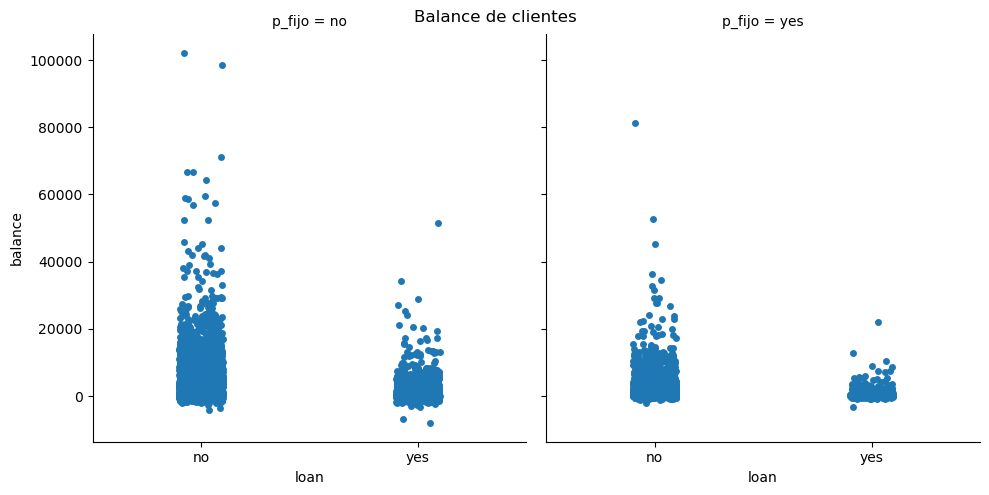

In [14]:
rel= sns.catplot(data=grouped, x='loan', y='balance', col= 'p_fijo')
rel.fig.suptitle('Balance de clientes')

> Acá podemos ver mejor las personas que sí hicieron un plazo fijo. Se distribuyó en dos, los que sí y los que no tienen préstamos personales

En conclusión, es verdad nuestra hipótesis de que los clientes que han realizado un plazo fijo, en su gran mayoría lo hicieron sin créditos o préstamos personales. Sin embargo, llama la atención el gran número de clientes que sin un préstamo no han hecho un depósito. Eso puede deberse a otras variables.

> Ahora veamos nuestra hipóstesis sobre las edades 

In [46]:
edades = df.groupby(['age']).value_counts()
edades = pd.DataFrame(edades)

In [47]:
edades = edades.sort_index(ascending = True)

In [48]:
edades.reset_index(inplace=True)

In [49]:
edades= edades.sort_values(by='age')

C:\Users\Fabrizio\AppData\Local\Temp\ipykernel_13616\1308301129.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= edades['age'][0:3050], y= edades['balance'][0:3050], hue= edades['p_fijo'][0:3050])
C:\Users\Fabrizio\AppData\Local\Temp\ipykernel_13616\1308301129.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= edades['age'][3050:26008], y= edades['balance'][3050:26008], hue= edades['p_fijo'][3050:26008])
C:\Users\Fabrizio\AppData\Local\Temp\ipyke

<AxesSubplot:xlabel='age', ylabel='balance'>

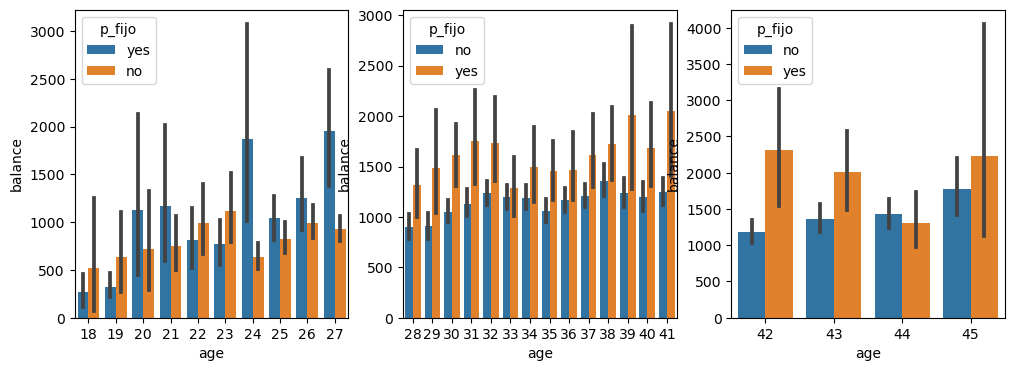

In [70]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
sns.barplot(x= edades['age'][0:3050], y= edades['balance'][0:3050], hue= edades['p_fijo'][0:3050])

plt.subplot(1,3,2)
sns.barplot(x= edades['age'][3050:26008], y= edades['balance'][3050:26008], hue= edades['p_fijo'][3050:26008])

plt.subplot(1,3,3)
sns.barplot(x= edades['age'][26009:30000], y= edades['balance'][26009:30000], hue= edades['p_fijo'][26009:30000])

C:\Users\Fabrizio\AppData\Local\Temp\ipykernel_13616\1342874940.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= edades['age'][30000:40000], y= edades['balance'][30000:40000], hue= edades['p_fijo'][30000:40000])
C:\Users\Fabrizio\AppData\Local\Temp\ipykernel_13616\1342874940.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= edades['age'][40000:44000], y= edades['balance'][40000:44000], hue= edades['p_fijo'][40000:44000])
C:\Users\Fabrizio\AppDat

<AxesSubplot:xlabel='age', ylabel='balance'>

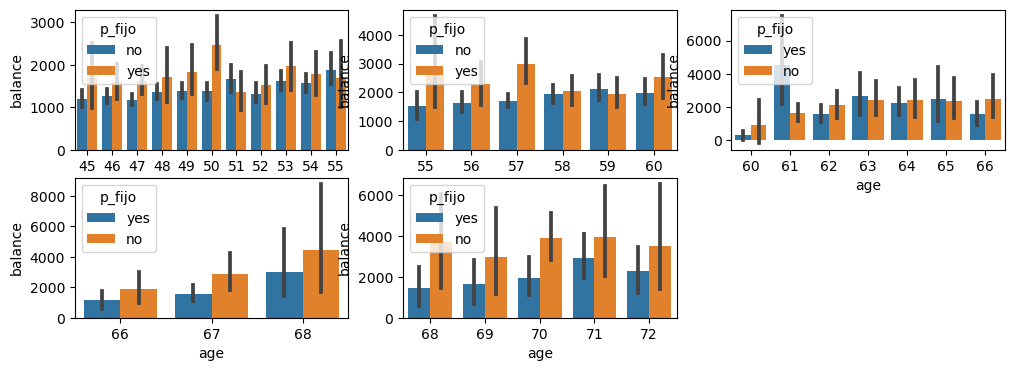

In [56]:
plt.figure(figsize = (12,4))
plt.subplot(2,3,1)
sns.barplot(x= edades['age'][30000:40000], y= edades['balance'][30000:40000], hue= edades['p_fijo'][30000:40000])

plt.subplot(2,3,2)
sns.barplot(x= edades['age'][40000:44000], y= edades['balance'][40000:44000], hue= edades['p_fijo'][40000:44000])

plt.subplot(2,3,3)
sns.barplot(x= edades['age'][44000:44500], y= edades['balance'][44000:44500], hue= edades['p_fijo'][44000:44500])

plt.subplot(2,3,4)
sns.barplot(x= edades['age'][44500:44600], y= edades['balance'][44000:44600], hue= edades['p_fijo'][44000:44600])

plt.subplot(2,3,5)
sns.barplot(x= edades['age'][44600:44800], y= edades['balance'][44600:44800], hue= edades['p_fijo'][44600:44800])

Con estos dos gráficos podemos hacernos un rápido pantallazo viendo el mínimo de balance por grupo de edad de aquellos consumidores que sí hicieron un depósito. Vemos que en la mayoría de los casos del grupo etario de entre 18 y 44 años de edad, no lograr superar al límite mínimo del grupo de entre 45 y 72 años.

[Text(0.5, 1.0, 'Distribución del balance de clientes por nivel de educación')]

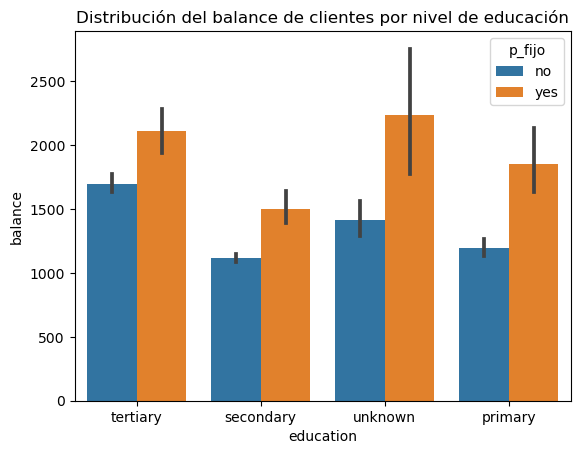

In [63]:
sns.barplot(x="education", y="balance", hue="p_fijo", data=df).set(title='Distribución del balance de clientes por nivel de educación')

En cuanto a la 3° Hipótesis, nos encontramos con que el nivel de educación terciaria es el que mayor número de depósitos en plazo fijo ha realizado. Sin embargo, esto es sin contar al grupo de personas con un nivel educativo desconocido. A pesar de ello. El análisis nos muestra que por debajo del nivel terciario, se encuentra el nivel primario. Este dato me sorprende, porque esperaba que el nivel educativo secundario fuera el que siguiera al nivel terciario.

[Text(0.5, 1.0, 'Distribución del balance de clientes por estado civil')]

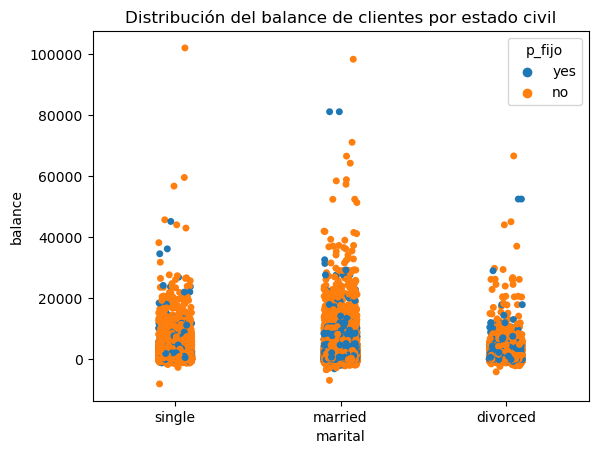

In [58]:
sns.stripplot(data=edades, x='marital', y='balance', hue = 'p_fijo').set(title='Distribución del balance de clientes por estado civil')

Text(0.5, 0.98, 'Balance de clientes por estado civil')

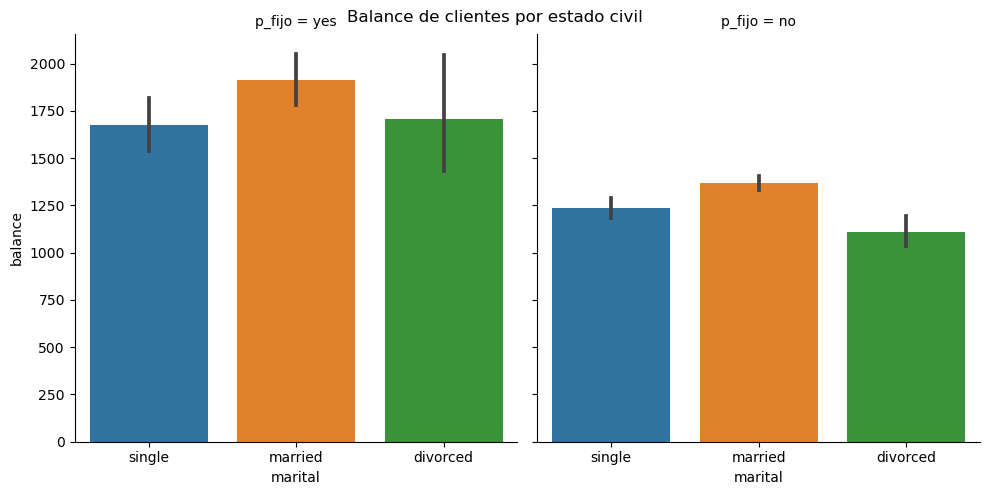

In [62]:
marital= sns.catplot(data=edades, x='marital', y='balance', col= 'p_fijo', kind= 'bar')
marital.fig.suptitle('Balance de clientes por estado civil')

Nuestra 4° Hipótesis de que las personas con estado civil de casados, tienden a realizar mayor cantidad de plazos fijos ha sido comprobada con este gráfico. 